#  <center>  Predicting Loan Eligibility By Machine Learning Algorithms <center> 

# 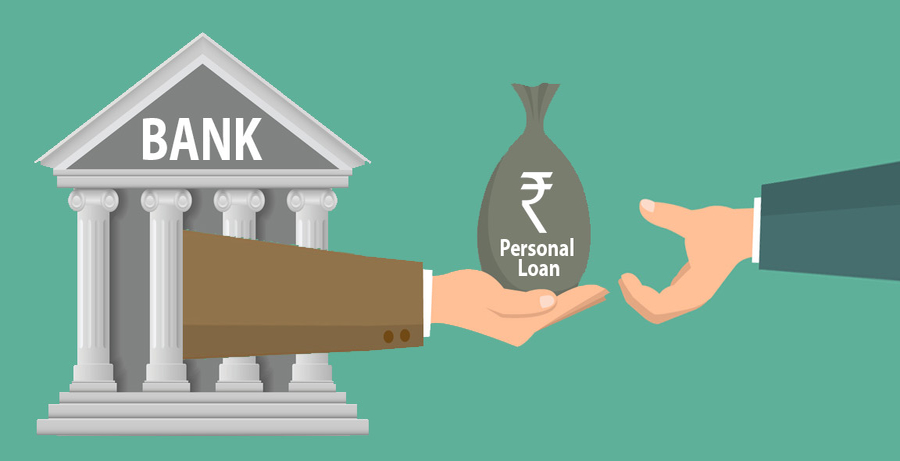

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-Dataset" data-toc-modified-id="Loading-Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading Dataset</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Predicting-Loan-Status" data-toc-modified-id="Predicting-Loan-Status-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predicting Loan Status</a></span><ul class="toc-item"><li><span><a href="#Encoding-Categorical-Variables" data-toc-modified-id="Encoding-Categorical-Variables-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Encoding Categorical Variables</a></span></li><li><span><a href="#Splitting-the-Data" data-toc-modified-id="Splitting-the-Data-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Splitting the Data</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#K-Nearest-Neighbors-Classifier" data-toc-modified-id="K-Nearest-Neighbors-Classifier-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>K-Nearest Neighbors Classifier</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li><li><span><a href="#XGBoost-Classifier" data-toc-modified-id="XGBoost-Classifier-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>XGBoost Classifier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Introduction

The dataset used this project is retrieved from kaggle, the home of Data Science. There are three parts to our report, as follows:

-  Data Cleaning and Feature Engineering 
-  Exploratory Data Analysis 
-  Prediction of Loan Status 

The major objective of this project is to predict whether the bank will approve the loan based on certain information. Therefore, this is a supervised classification problem to be trained. Algorithms tested for this project include Logistic Regression, Decision Tree Classifier, Random Forest Classifier, KNearest Neighbors, Support Vector Classifier and XGBoost Classifier. Hyperparametric tuning will be performed by sklearn's GridSearchCV. We will compare the results of these models to discover which algorithm works better for this specific dataset.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import plotly.io as pio
pio.renderers.default='notebook'

## Loading Dataset

In [ ]:
df=pd.read_csv('../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

## Data Cleaning

First we create a dataframe that shows the percentage of null values in each column of df.

In [ ]:
100*df.isnull().sum()/df.shape[0]

Now we select the columns that contain between 0.5% and 70% null values, and replace the null values with the mean (for numerical columns) or median (for categorical columns) of each column.

**Gender**

In [ ]:
pd.get_dummies(df['Gender'].dropna(), drop_first=True).median()

In [ ]:
df['Gender']=df['Gender'].fillna('Male')   

**Dependents**

In [ ]:
df['Dependents'].unique()

In [ ]:
df['Dependents'].dtypes

In [ ]:
le=LabelEncoder()
le.fit(df['Dependents'].dropna())
pd.Series(le.transform(df['Dependents'].dropna())).median()

In [ ]:
df['Dependents']=df['Dependents'].fillna('0')   

**Self_Employed**

In [ ]:
df['Self_Employed'].unique()

In [ ]:
pd.get_dummies(df['Self_Employed'].dropna(), drop_first=True).median()

In [ ]:
df['Self_Employed']=df['Self_Employed'].fillna('No')   

**LoanAmount**

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())   

**Loan_Amount_Term**

In [ ]:
df['Loan_Amount_Term'].unique()

In [ ]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())   

**Credit_History**

In [ ]:
df['Credit_History'].unique()

In [ ]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())   

**Married**

Fianlly the Married column that contain less than 0.5% null values is remained, and we drop the rows of df that contain these null values.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

## Feature Engineering

We rename some of the columns.

In [ ]:
df.columns=df.columns.str.lower()

In [ ]:
df.columns=['loan_id', 'gender', 'married', 'dependents', 'education','self_employed', 'applicant_income', 'co-applicant_income', 'loan_amount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']

In [ ]:
df.head(2)

In [ ]:
df.shape

In [ ]:
df.describe()

## Exploratory Data Analysis

We want to figure out how many applicants are eligible for loan.

In [ ]:
df[df['loan_status']=='Y'].count()['loan_status']

In [ ]:
df[df['loan_status']=='N'].count()['loan_status']

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(x=[419,192], labels=['Yes','No'], autopct='%1.0f%%', pctdistance=0.5,labeldistance=0.7,shadow=True, startangle=90, colors=['limegreen', 'deeppink'], textprops={'fontsize':14})
plt.title('Distribution of Loan Status', fontsize=18)
plt.show()

We can see that bank approves loans requested by 69% of applicants and does not approve loans requested by 39% of applicants.

Let's find visualize the impacts of different factors on loan status.

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.countplot(x='gender' ,hue='loan_status', data=df,palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.subplot(2,3,2)
sns.countplot(x='married',hue='loan_status',data=df,palette='viridis')
plt.ylabel(' ')
plt.yticks([ ])
plt.xlabel('Married', fontsize=14)
plt.title('The Impacts Of Different Factors On Loan Status\n', fontsize=18)

plt.subplot(2,3,3)
sns.countplot(x='education',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.countplot(x='credit_history', data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Number', fontsize=14)

plt.subplot(2,3,5)
sns.countplot(x='self_employed',hue='loan_status',data=df,palette='autumn')
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.countplot(x='property_area',hue='loan_status',data=df,palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()

From the above analysis, it can be concluded that:

- Male Individuals have more chance of receiving the Loan.

- Married Individuals have more chance of receiving the Loan.
   
- Graduate Individuals have more chance of receiving the Loan.
    
- Not Self-Employed have more chance of receiving the Loan.

- Individuals with a credit history have more chance of receiving the Loan.
    
- People living in Semi-Urban Area have more chance to receive the Loan.

Now we illustrate the loan status versus the gender, marrital status and education of individuals.

In [ ]:
df['married_revised']=df['married'].apply(lambda x: 'Married' if x=='Yes' else 'Single')

In [ ]:
df['loan_status_revised']=df['loan_status'].apply(lambda x: 'Receive Loan' if x=='Y' else 'Not Receive Loan')

In [ ]:
fig=px.sunburst( data_frame=df,path=['gender','married_revised','education','loan_status_revised'], color='loan_amount', color_continuous_scale='rainbow', height=800, width=800)
fig.update_layout(
    title={
        'text': 'Loan Status Versus Gender, Marrital Status And Education \n',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [ ]:
df.drop(['married_revised','loan_status_revised'], axis=1, inplace=True)

Now we visualize the impacts of different factors on the amount of loans.

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
sns.violinplot(x='gender', y='loan_amount',hue='loan_status', data=df,palette='plasma')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.subplot(2,3,2)
sns.violinplot(x='married',y='loan_amount',hue='loan_status',data=df,palette='viridis')
plt.xlabel('Married', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.title('The Impacts Of Different Factors On The Amount Of Loans\n', fontsize=18)

plt.subplot(2,3,3)
sns.violinplot(x='education',y='loan_amount',hue='loan_status',data=df,palette='copper')
plt.xlabel('Education', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,4)
sns.violinplot(x='credit_history',y='loan_amount', data=df,hue='loan_status',palette='summer')
plt.xlabel('Credit History', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)

plt.subplot(2,3,5)
sns.violinplot(x='self_employed',y='loan_amount',hue='loan_status',data=df,palette='autumn')
plt.xlabel('Self Employed', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])

plt.subplot(2,3,6)
sns.violinplot(x='property_area', y='loan_amount',data=df,hue='loan_status',palette='PuBuGn')
plt.xlabel('Property Area', fontsize=14)
plt.ylabel(' ')
plt.yticks([ ])
plt.show()

Now we analyze the distribution of applicant_income, co-applicant_income and loan_amount.

In [ ]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.distplot(df['applicant_income'],bins=30,color='deeppink',hist_kws=dict(edgecolor='black'))
plt.xlabel('Applicant Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1,3,2)
sns.distplot(df['co-applicant_income'],bins=30,color='cyan',hist_kws=dict(edgecolor='black'))
plt.xlabel('Co-Applicant Income', fontsize=14)
plt.title('Distribution Of Applicant Income, Co-Applicant Income and Loan Ammount\n', fontsize=18)

plt.subplot(1,3,3)
sns.distplot(df['loan_amount'],bins=30,color='lime',hist_kws=dict(edgecolor='black'))
plt.xlabel('Loan Ammount', fontsize=14)
plt.show()

Here we visualize the relationship between applicant_income, co-applicant_income and loan_amount.

In [ ]:
fig=px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')
fig.update_layout(
    title={
        'text': 'Relationship Between Applicant Income, Co-Applicant Income and Loan Ammount',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## Predicting Loan Status

### Encoding Categorical Variables

**Gender**

In [ ]:
le1=LabelEncoder()
le1.fit(df['gender'])
df['gender']=le1.transform(df['gender'])

**Married**

In [ ]:
le2=LabelEncoder()
le2.fit(df['married'])
df['married']=le2.transform(df['married'])

**Education**

In [ ]:
le3=LabelEncoder()
le3.fit(df['education'])
df['education']=le3.transform(df['education'])

**Self Employed**

In [ ]:
le4=LabelEncoder()
le4.fit(df['self_employed'])
df['self_employed']=le4.transform(df['self_employed'])

**Property Area**

In [ ]:
le5=LabelEncoder()
le5.fit(df['property_area'])
df['property_area']=le5.transform(df['property_area'])

**Dependents**

In [ ]:
le6=LabelEncoder()
le6.fit(df['dependents'])
df['dependents']=le6.transform(df['dependents'])

### Splitting the Data

In [ ]:
X=df.drop(['loan_id','loan_status'],axis=1)
y=df['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

### Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X,y)
predictions_lr=lr.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_lr))
print('\n')
print(classification_report(y_test,predictions_lr))

### Decision Tree Classifier

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
predictions_dtc=dtc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_dtc))
print("\n")
print(classification_report(y_test,predictions_dtc))

### Random Forest Classifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
predictions_rfc=rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_rfc))
print('\n')
print(classification_report(y_test,predictions_rfc))

### K-Nearest Neighbors Classifier

In [ ]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    predictions_knn=knn.predict(X_test)
    error_rate.append(np.mean(predictions_knn!=y_test))

In [ ]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='royalblue', marker='o', linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink')
plt.xlabel('Number of Neighbors', fontsize=14)
plt.ylabel('Error Rate', fontsize=14)
plt.title('Elbow Method', fontsize=18)
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
predictions_knn=knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_knn))
print('\n')
print(classification_report(y_test,predictions_knn))

### Support Vector Classifier

In [ ]:
svc=SVC()
svc.fit(X_train,y_train)
predictions_svc=svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_svc))
print('\n')
print(classification_report(y_test,predictions_svc))

To improve the results obtained by SVC, we use GridSearchCV and define C and gamma parameters.

In [ ]:
param_grid={'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

In [ ]:
gs=GridSearchCV(SVC(),param_grid, verbose=3)
gs.fit(X_train,y_train)
predictions_gs=gs.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_gs))
print('\n')
print(classification_report(y_test,predictions_gs))

We can see that even optimization of SVC model by Grid Search does not improve the accuracy.

### XGBoost Classifier

In [ ]:
xgbc=xgb.XGBClassifier(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)
xgbc.fit(X_train,y_train)

In [ ]:
predictions_xgbc=xgbc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predictions_xgbc))
print('\n')
print(classification_report(y_test,predictions_xgbc))

In [ ]:
print('Accuracy Score, Logistic Regression: ', round(accuracy_score(y_test,predictions_lr),ndigits=4))
print('Accuracy Score, Decision Tree Classifier: ', round(accuracy_score(y_test,predictions_dtc),ndigits=4))
print('Accuracy Score, Random Forest Classifier: ', round(accuracy_score(y_test,predictions_rfc),ndigits=4))
print('Accuracy Score, K-Nearest Neighbors Classifier: ', round(accuracy_score(y_test,predictions_knn),ndigits=4))
print('Accuracy Score, Support Vector Classifier: ', round(accuracy_score(y_test,predictions_gs),ndigits=4))
print('Accuracy Score, XGBoost Classifier: ', round(accuracy_score(y_test,predictions_xgbc), ndigits=4))

So we conclude that Logistic Regression with the accuracy of 82.11% is the best model to predict whether the bank will approve the loan or not.

## Conclusion

-  We performed Data Cleaning and Feature Engineering to convert the dataset to an acceptable format.

-  We performed Exploratory Data Analysis and visualized the loan status versus different features.

- Logistic Regression algorithm with the accuracy of 82.11% was the best model for predicting whether the bank will approve the requested loans.